In [65]:
#importing all the libraries that we need in our analysis
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics


from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import statsmodels.api as sm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [66]:
#importing data from excel file and assigning it to dataframe named "Data"
Data = pd.read_excel("Input.xlsx")

In [67]:
#lets see how the data looks like
Data.head(5)

,PCE,IndustrialProdNAICS,Comm_Indus_Loans,CapacityUtilization,AllEmployeesPrivate,ContinuedClaims,InitialClaims,CPI,M2,M1,EmployeesNonFarm,HousingUnits,HourlyEarningPrivate,IndustrialProductionIndex
0,901.4,42.2744,162.7902,87.3874,64010,1957000,305250,46.8,859.7,263.8,78100,1451,4.27,46.8994
1,910.8,42.0910,164.6969,86.8692,64119,2012250,318500,47.3,864.2,265.3,78254,1752,4.29,46.7538
2,922.4,42.0853,168.1316,86.6610,64144,2055600,311600,47.8,870.1,266.7,78296,1555,4.32,46.7685
3,928.0,41.8849,174.3365,86.1406,64191,2066000,293000,48.1,872.9,267.2,78382,1607,4.33,46.6069
4,937.9,42.1703,177.4089,86.6077,64328,2051750,297500,48.6,874.6,267.6,78549,1426,4.40,46.9743


In [68]:
#checking the number of values, their data types,number of columns etc.
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PCE                        555 non-null    float64
 1   IndustrialProdNAICS        555 non-null    float64
 2   Comm_Indus_Loans           555 non-null    float64
 3   CapacityUtilization        555 non-null    float64
 4   AllEmployeesPrivate        555 non-null    int64  
 5   ContinuedClaims            555 non-null    int64  
 6   InitialClaims              555 non-null    int64  
 7   CPI                        555 non-null    float64
 8   M2                         555 non-null    float64
 9   M1                         555 non-null    float64
 10  EmployeesNonFarm           555 non-null    int64  
 11  HousingUnits               555 non-null    int64  
 12  HourlyEarningPrivate       555 non-null    float64
 13  IndustrialProductionIndex  555 non-null    float64

In [69]:
#checking the mean, median,max,min etc.
Data.describe()

,PCE,IndustrialProdNAICS,Comm_Indus_Loans,CapacityUtilization,AllEmployeesPrivate,ContinuedClaims,InitialClaims,CPI,M2,M1,EmployeesNonFarm,HousingUnits,HourlyEarningPrivate,IndustrialProductionIndex
count,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02,5.550000e+02,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,6370.869009,75.673601,917.419739,79.458209,97530.362162,2.822504e+06,3.704568e+05,157.318157,5464.745946,1321.932252,116904.163964,1385.790991,13.200703,78.119703
std,4070.361218,23.756359,585.691170,3.784280,18876.193314,7.876575e+05,1.275599e+05,60.931633,3974.748642,971.445222,21490.885925,393.955200,5.510148,21.765484
min,901.400000,35.975200,162.790200,66.687200,61665.000000,1.657500e+06,2.114000e+05,46.800000,859.700000,263.800000,76460.000000,478.000000,4.270000,41.151500
25%,2763.450000,51.683100,488.156300,76.898500,81124.500000,2.277100e+06,3.161000e+05,107.800000,2436.750000,592.650000,97744.000000,1126.500000,8.750000,56.369450
50%,5459.300000,78.695300,788.590900,79.841700,102077.000000,2.619250e+06,3.556000e+05,159.700000,3836.300000,1101.200000,121675.000000,1424.000000,12.310000,80.793000
75%,9910.900000,99.834600,1230.297250,82.306300,111907.000000,3.211000e+06,4.077500e+05,213.087500,7810.950000,1441.550000,133884.000000,1655.500000,18.190000,99.310500
max,14914.300000,108.585800,2509.785900,87.387400,129718.000000,6.534250e+06,2.666750e+06,259.050000,16103.700000,4268.300000,152463.000000,2273.000000,24.100000,110.551600


In [70]:
#plotting all the features (including dependent feature) with each other
#sns.pairplot(Data)

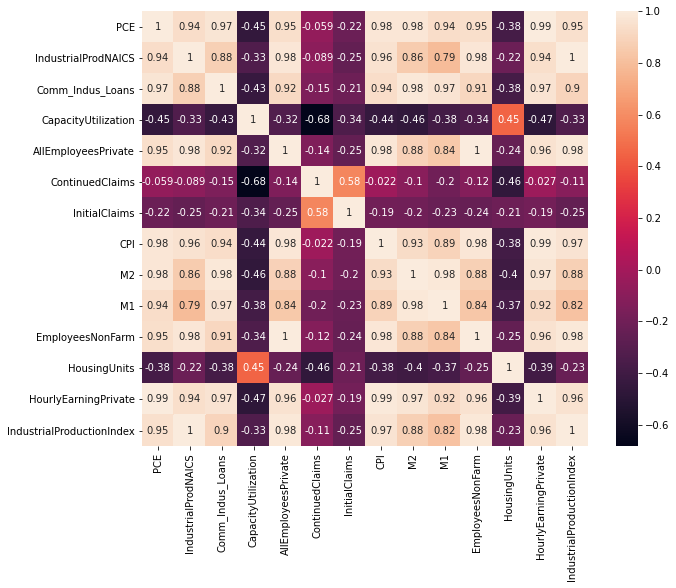

In [71]:
#checking the LINEAR correlation. It might be possible that they have non-linear relation which is not detected here
plt.figure(figsize=(10, 8))
sns.heatmap(Data.corr(),annot=True)

In [72]:
#segregating dependent variable i.e the one which we want to predict
Y = Data['PCE']
Y.tail()

550    14909.9
551    14914.3
552    13925.8
553    12168.2
554    13162.6
Name: PCE, dtype: float64

In [73]:
#all independent variables. It is done by just dropping dependent variable (i.e PCE) from  original dataframe
X = Data.drop(['PCE'],axis=1)
X.tail()

,IndustrialProdNAICS,Comm_Indus_Loans,CapacityUtilization,AllEmployeesPrivate,ContinuedClaims,InitialClaims,CPI,M2,M1,EmployeesNonFarm,HousingUnits,HourlyEarningPrivate,IndustrialProductionIndex
550,106.1088,2360.2896,77.5723,129155,1692200,214800,257.824,15247.4,3947.5,151814,1371,23.81,110.0388
551,106.3594,2358.5208,77.1697,129319,1736000,226000,258.444,15302.3,3977.0,151998,1587,23.84,109.6527
552,106.1797,2352.4245,76.7908,129498,1737750,212750,258.820,15417.8,3977.1,152212,1617,23.88,109.2128
553,106.1679,2359.4329,76.8046,129718,1703800,211400,259.050,15511.5,4009.9,152463,1567,23.96,109.3608
554,100.5696,2509.7859,73.2102,128362,3497750,2666750,257.953,16103.7,4268.3,151090,1269,24.10,104.3554


In [74]:
#train test split
#test_size tells how much part should go into test data.Here 25%(139) of total(555) 
#random_state ensures that same data-points go into either train(or test) every time you invoke this split
Train_x, Test_x, Train_y, Test_y = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [75]:
#adding a constant gives b0 i.e the constant value. Otherwise algorithm starts from origin.
Train_x = sm.add_constant(Train_x)
model = sm.OLS(Train_y, Train_x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PCE   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.603e+04
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:12:54   Log-Likelihood:                -2736.9
No. Observations:                 416   AIC:                             5502.
Df Residuals:                     402   BIC:                             5558.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -2255.1352    646.217     -3.490      0.001   -3525.522    -984.748
IndustrialProdNAICS         126.9585     15.277      8.311      0.000      96.926     156.991
Comm_Indus_Loans              0.8273      0.159      5.196      0.000       0.514       1.140
CapacityUtilization           5.6950      7.077      0.805      0.421      -8.217      19.607
AllEmployeesPrivate          -0.3052      0.055     -5.511      0.000      -0.414      -0.196
ContinuedClaims            -5.06e-06   5.65e-05     -0.090      0.929      -0.000       0.000
InitialClaims                 0.0003      0.000      0.719      0.472      -0.000       0.001
CPI                           6.9951      4.061      1.723      0.086      -0.988      14.978
M2                            0.3524      0.068      5.166      0.000       0.218       0.486
M1                            0.5068      0.137      3.705      0.000       0.238       0.776
EmployeesNonFarm              0.2417      0.047      5.096      0.000       0.148       0.335
HousingUnits                  0.0133      0.042      0.314      0.753      -0.070       0.096
HourlyEarningPrivate        125.0829     70.906      1.764      0.078     -14.311     264.477
IndustrialProductionIndex   -78.5955     17.959     -4.376      0.000    -113.900     -43.291
==============================================================================
Omnibus:                      583.746   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171873.690
Skew:                          -6.789   Prob(JB):                         0.00
Kurtosis:                     101.648   Cond. No.                     2.22e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
Train_x = Train_x.drop(["CapacityUtilization","ContinuedClaims","InitialClaims","CPI","HousingUnits"],axis=1)

In [77]:
Train_x = sm.add_constant(Train_x)
model = sm.OLS(Train_y, Train_x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PCE   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.595e+04
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:12:56   Log-Likelihood:                -2740.3
No. Observations:                 416   AIC:                             5499.
Df Residuals:                     407   BIC:                             5535.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -1933.1267    332.766     -5.809      0.000   -2587.282   -1278.971
IndustrialProdNAICS         127.9948     13.590      9.418      0.000     101.279     154.711
Comm_Indus_Loans              0.7736      0.136      5.696      0.000       0.507       1.041
AllEmployeesPrivate          -0.3036      0.032     -9.528      0.000      -0.366      -0.241
M2                            0.2774      0.049      5.708      0.000       0.182       0.373
M1                            0.6204      0.109      5.688      0.000       0.406       0.835
EmployeesNonFarm              0.2439      0.028      8.618      0.000       0.188       0.299
HourlyEarningPrivate        231.6603     23.774      9.744      0.000     184.926     278.395
IndustrialProductionIndex   -81.7117     15.764     -5.184      0.000    -112.700     -50.723
==============================================================================
Omnibus:                      585.726   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           173002.489
Skew:                          -6.834   Prob(JB):                         0.00
Kurtosis:                     101.965   Cond. No.                     5.96e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.96e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Actual')

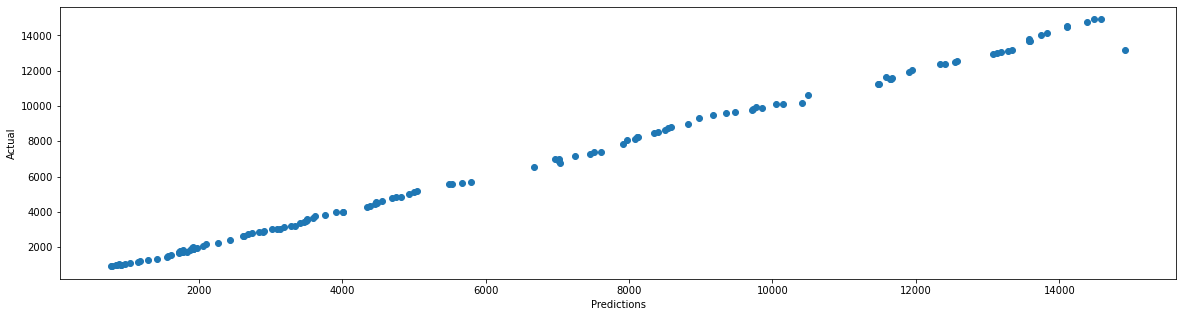

In [78]:
Test_x = Test_x.drop(["CapacityUtilization","ContinuedClaims","InitialClaims","CPI","HousingUnits"],axis=1)
Test_x = sm.add_constant(Test_x)
preds = model.predict(Test_x)
plt.figure(figsize=(20, 5))
plt.scatter(preds,Test_y)
plt.xlabel("Predictions")
plt.ylabel("Actual")

In [79]:
errors = abs(preds - Test_y)
mape = 100 * np.mean(errors / Test_y)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

Model Performance
Average Error: 112.8909 degrees.
Accuracy = 97.59%.


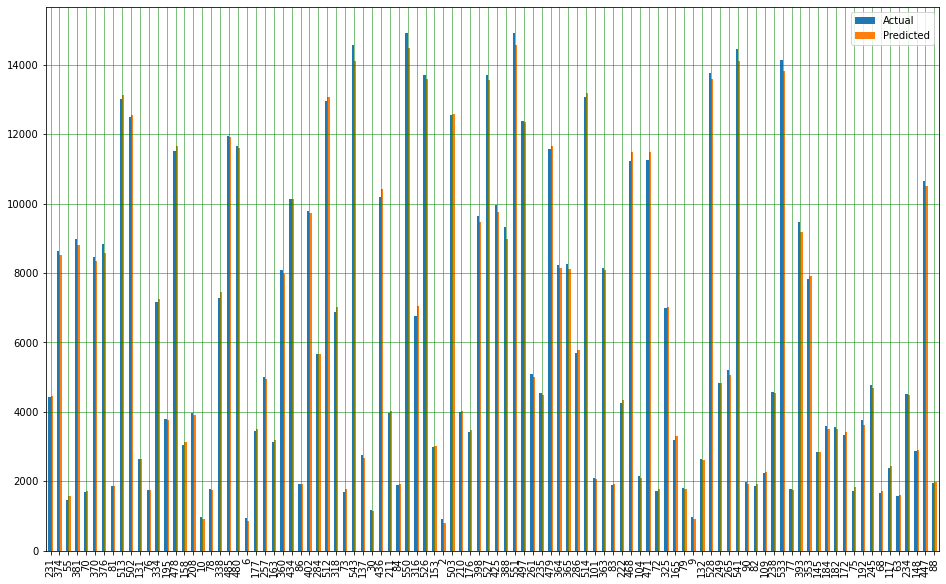

In [80]:
df = pd.DataFrame({'Actual': Test_y, 'Predicted': preds})
df1 = df.head(100)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [81]:
#Important assessment parameters for model accuracy
print('Explained Variance    = {:0.3f}.'.format(metrics.explained_variance_score(Test_y,predictions)))
print('Max Error             = {:0.3f}.'.format(metrics.max_error(Test_y,predictions)))
print('Mean Absolute Error   = {:0.3f}.'.format(metrics.mean_absolute_error(Test_y,predictions)))
print('Mean Squared Error    = {:0.3f}.'.format(metrics.mean_squared_error(Test_y,predictions)))
print('Median Absolute Error = {:0.3f}.'.format(metrics.median_absolute_error(Test_y,predictions)))
print('R2 Score              = {:0.3f}.'.format(metrics.r2_score(Test_y,predictions)))

Explained Variance    = 0.990.
Max Error             = 4784.343.
Mean Absolute Error   = 94.417.
Mean Squared Error    = 190078.418.
Median Absolute Error = 29.065.
R2 Score              = 0.990.


In [19]:
#train test split
#test_size tells how much part should go into test data.Here 25%(139) of total(555) 
#random_state ensures that same data-points go into either train(or test) every time you invoke this split
Train_x, Test_x, Train_y, Test_y = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [24]:
#calling regressor and defining number of trees to be made by n_estimators
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)
#fitting training data to our model to learn
rf.fit(Train_x, Train_y)
#making predictions
predictions = rf.predict(Test_x)

#part below calculates accuracy of model
errors = abs(predictions - Test_y)
print('Average model error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / Test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Average model error: 28.8 degrees.
Accuracy: 99.48 %.


In [21]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [22]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(Train_x, Train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [ ]:
predictions = rf_random.predict(Test_x)
errors = abs(predictions - Test_y)
mape = 100 * np.mean(errors / Test_y)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

In [25]:
#checking the most important features. Their values from a total of 1.
importances = list(rf.feature_importances_)
feature_list = list(X.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: M2                   Importance: 0.32
Variable: HourlyEarningPrivate Importance: 0.3
Variable: CPI                  Importance: 0.26
Variable: M1                   Importance: 0.08
Variable: EmployeesNonFarm     Importance: 0.02
Variable: Comm_Indus_Loans     Importance: 0.01
Variable: AllEmployeesPrivate  Importance: 0.01
Variable: IndustrialProdNAICS  Importance: 0.0
Variable: CapacityUtilization  Importance: 0.0
Variable: ContinuedClaims      Importance: 0.0
Variable: InitialClaims        Importance: 0.0
Variable: HousingUnits         Importance: 0.0
Variable: IndustrialProductionIndex Importance: 0.0


In [ ]:
#which features should gives us 95% importance
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
cumulative_importances = np.cumsum(sorted_importances)
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

In [28]:
Train_x = Train_x[['M2','HourlyEarningPrivate','CPI','M1','EmployeesNonFarm']]
Test_x = Test_x[['M2','HourlyEarningPrivate','CPI','M1','EmployeesNonFarm']]

In [29]:
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf.fit(Train_x, Train_y)
predictions = rf.predict(Test_x)
errors = abs(predictions - Test_y)
print('Average model error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / Test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Average model error: 34.97 degrees.
Accuracy: 99.5 %.


In [30]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(Train_x, Train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [31]:
predictions = rf_random.predict(Test_x)
errors = abs(predictions - Test_y)
mape = 100 * np.mean(errors / Test_y)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

Model Performance
Average Error: 34.3342 degrees.
Accuracy = 99.51%.


Text(0, 0.5, 'Actual')

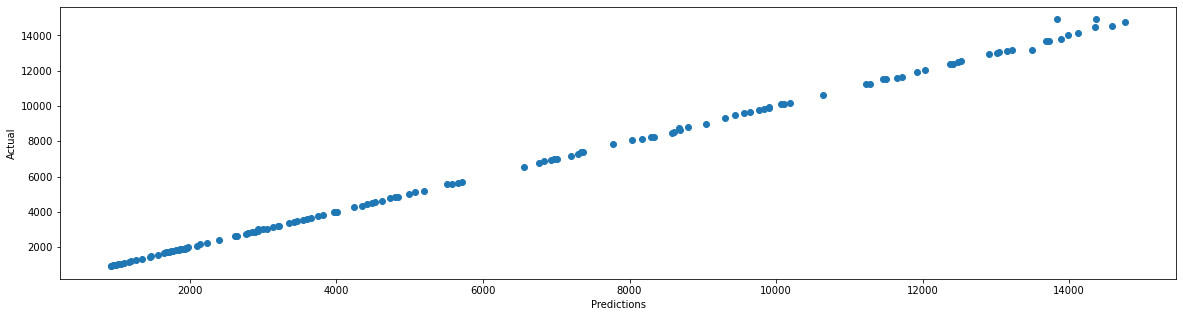

In [33]:
plt.figure(figsize=(20, 5))
plt.scatter(predictions,Test_y)
plt.xlabel("Predictions")
plt.ylabel("Actual")

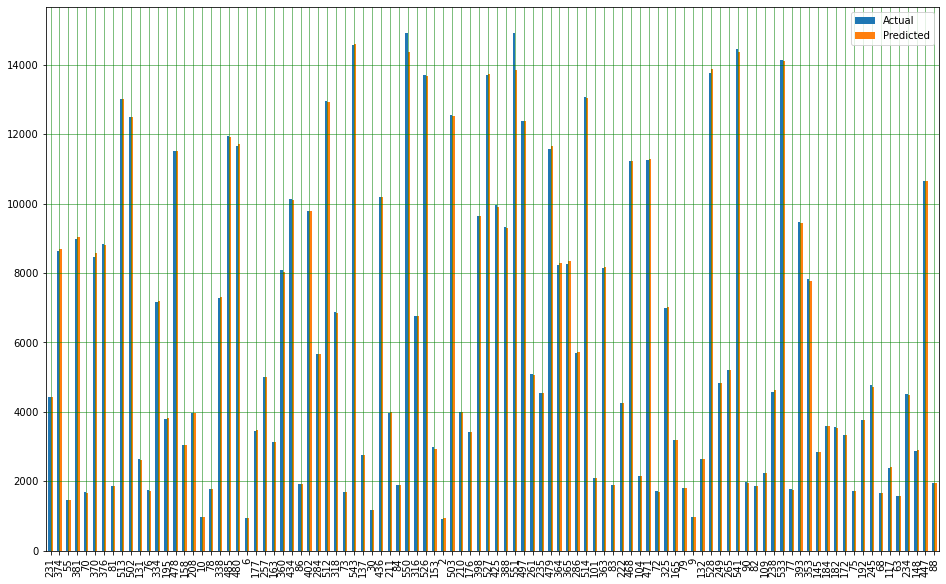

In [34]:
df = pd.DataFrame({'Actual': Test_y, 'Predicted': predictions})
df1 = df.head(100)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [82]:
#Important assessment parameters for model accuracy
print('Explained Variance    = {:0.3f}.'.format(metrics.explained_variance_score(Test_y,predictions)))
print('Max Error             = {:0.3f}.'.format(metrics.max_error(Test_y,predictions)))
print('Mean Absolute Error   = {:0.3f}.'.format(metrics.mean_absolute_error(Test_y,predictions)))
print('Mean Squared Error    = {:0.3f}.'.format(metrics.mean_squared_error(Test_y,predictions)))
print('Median Absolute Error = {:0.3f}.'.format(metrics.median_absolute_error(Test_y,predictions)))
print('R2 Score              = {:0.3f}.'.format(metrics.r2_score(Test_y,predictions)))

Explained Variance    = 0.990.
Max Error             = 4784.343.
Mean Absolute Error   = 94.417.
Mean Squared Error    = 190078.418.
Median Absolute Error = 29.065.
R2 Score              = 0.990.


In [35]:
#train test split
#test_size tells how much part should go into test data.Here 25%(139) of total(555) 
#random_state ensures that same data-points go into either train(or test) every time you invoke this split
Train_x, Test_x, Train_y, Test_y = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [36]:
#calling XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(Train_x,Train_y , verbose=False)

#making predictions
predictions = XGBModel.predict(Test_x)
errors = abs(predictions - Test_y)
mape = 100 * np.mean(errors / Test_y)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

[19:02:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Performance
Average Error: 47.6183 degrees.
Accuracy = 99.02%.


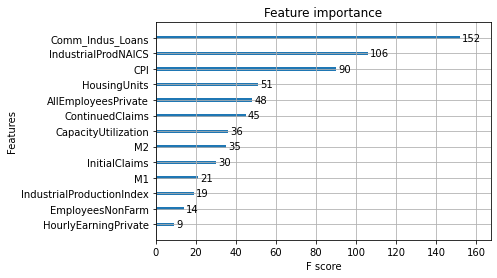

<Figure size 1152x864 with 0 Axes>

In [37]:
#feature importance using XGBoost
xgb.plot_importance(XGBModel)
plt.figure(figsize = (16, 12))
plt.show()

In [38]:
Train_x = Train_x[['Comm_Indus_Loans','IndustrialProdNAICS','CPI','M1','AllEmployeesPrivate']]
Test_x = Test_x[['Comm_Indus_Loans','IndustrialProdNAICS','CPI','M1','AllEmployeesPrivate']]

In [39]:
#calling XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(Train_x,Train_y , verbose=False)

#making predictions
predictions = XGBModel.predict(Test_x)
errors = abs(predictions - Test_y)
mape = 100 * np.mean(errors / Test_y)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

[19:02:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Performance
Average Error: 58.5991 degrees.
Accuracy = 98.98%.


In [40]:
Train_x, Test_x, Train_y, Test_y = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [41]:
#first initializing the parameters and then calling GridSearchCV 
from sklearn.model_selection import GridSearchCV
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5, #cross validation using 5-fold split
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(Train_x,Train_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:   13.3s finished


GridSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             verbose=True)

In [42]:
predictions = xgb_grid.predict(Test_x)
errors = abs(predictions - Test_y)
mape = 100 * np.mean(errors / Test_y)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

Model Performance
Average Error: 54.0127 degrees.
Accuracy = 99.21%.


In [43]:
Train_x = Train_x[['Comm_Indus_Loans','IndustrialProdNAICS','CPI','M1','AllEmployeesPrivate']]
Test_x = Test_x[['Comm_Indus_Loans','IndustrialProdNAICS','CPI','M1','AllEmployeesPrivate']]

In [44]:
#first initializing the parameters and then calling GridSearchCV 
from sklearn.model_selection import GridSearchCV
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5, #cross validation using 5-fold split
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(Train_x,Train_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:    9.8s finished


GridSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             verbose=True)

In [45]:
predictions = xgb_grid.predict(Test_x)
errors = abs(predictions - Test_y)
mape = 100 * np.mean(errors / Test_y)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

Model Performance
Average Error: 57.8600 degrees.
Accuracy = 99.13%.


Text(0, 0.5, 'Actual')

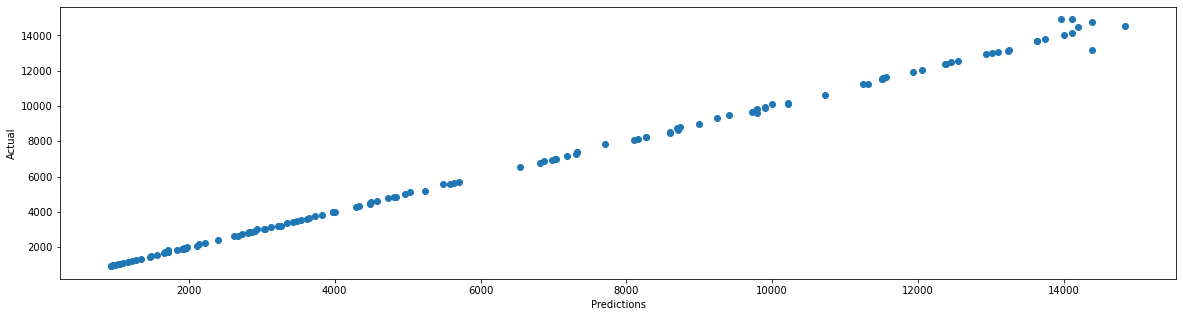

In [46]:
plt.figure(figsize=(20, 5))
plt.scatter(predictions,Test_y)
plt.xlabel("Predictions")
plt.ylabel("Actual")

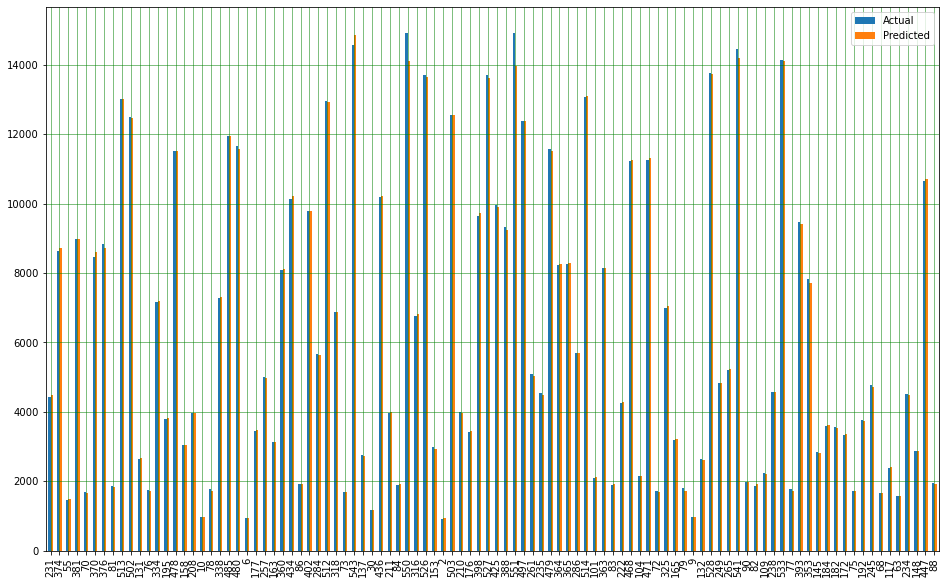

In [47]:
df = pd.DataFrame({'Actual': Test_y, 'Predicted': predictions})
df1 = df.head(100)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [83]:
#Important assessment parameters for model accuracy
print('Explained Variance    = {:0.3f}.'.format(metrics.explained_variance_score(Test_y,predictions)))
print('Max Error             = {:0.3f}.'.format(metrics.max_error(Test_y,predictions)))
print('Mean Absolute Error   = {:0.3f}.'.format(metrics.mean_absolute_error(Test_y,predictions)))
print('Mean Squared Error    = {:0.3f}.'.format(metrics.mean_squared_error(Test_y,predictions)))
print('Median Absolute Error = {:0.3f}.'.format(metrics.median_absolute_error(Test_y,predictions)))
print('R2 Score              = {:0.3f}.'.format(metrics.r2_score(Test_y,predictions)))

Explained Variance    = 0.990.
Max Error             = 4784.343.
Mean Absolute Error   = 94.417.
Mean Squared Error    = 190078.418.
Median Absolute Error = 29.065.
R2 Score              = 0.990.


In [48]:
#train test split
#test_size tells how much part should go into test data.Here 25%(139) of total(555) 
#random_state ensures that same data-points go into either train(or test) every time you invoke this split
Train_x, Test_x, Train_y, Test_y = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [53]:
sc = StandardScaler()
Train_x = sc.fit_transform(Train_x)
Test_x = sc.transform(Test_x)

In [54]:
# Initialising the ANN
model = Sequential()
#play with these values. Change this 80 to 50 or to 100 or any other value
# Adding the input layer and the first hidden layer
model.add(Dense(80, activation = 'relu', input_dim = 13))

# Adding the second hidden layer
model.add(Dense(units = 80, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 80, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [55]:
model.fit(Train_x, Train_y, batch_size = 20, epochs = 1500)

Epoch 1/1500
416/416 [==============================] - 0s 332us/step - loss: 57021565.0192
Epoch 2/1500
416/416 [==============================] - 0s 96us/step - loss: 56895754.0385
Epoch 3/1500
416/416 [==============================] - 0s 58us/step - loss: 56310068.5769
Epoch 4/1500
416/416 [==============================] - 0s 77us/step - loss: 54132299.7115
Epoch 5/1500
416/416 [==============================] - 0s 58us/step - loss: 48681375.7115
Epoch 6/1500
416/416 [==============================] - 0s 77us/step - loss: 37873927.0962
Epoch 7/1500
416/416 [==============================] - 0s 77us/step - loss: 22825430.2404
Epoch 8/1500
416/416 [==============================] - 0s 58us/step - loss: 9197855.9471
Epoch 9/1500
416/416 [==============================] - 0s 77us/step - loss: 5131759.0986
Epoch 10/1500
416/416 [==============================] - 0s 73us/step - loss: 4346718.9231
Epoch 11/1500
416/416 [==============================] - 0s 53us/step - loss: 3728168.8606


416/416 [==============================] - 0s 115us/step - loss: 36294.4814
Epoch 93/1500
416/416 [==============================] - 0s 96us/step - loss: 35642.7205
Epoch 94/1500
416/416 [==============================] - 0s 77us/step - loss: 36518.9808
Epoch 95/1500
416/416 [==============================] - 0s 96us/step - loss: 35922.0271
Epoch 96/1500
416/416 [==============================] - 0s 77us/step - loss: 34756.3771
Epoch 97/1500
416/416 [==============================] - 0s 96us/step - loss: 33583.5217
Epoch 98/1500
416/416 [==============================] - 0s 77us/step - loss: 33945.1305
Epoch 99/1500
416/416 [==============================] - 0s 115us/step - loss: 32192.8980
Epoch 100/1500
416/416 [==============================] - 0s 77us/step - loss: 33726.2493
Epoch 101/1500
416/416 [==============================] - 0s 77us/step - loss: 32878.0332
Epoch 102/1500
416/416 [==============================] - 0s 115us/step - loss: 33077.5259
Epoch 103/1500
416/416 [=====

416/416 [==============================] - 0s 96us/step - loss: 24485.0707
Epoch 184/1500
416/416 [==============================] - 0s 77us/step - loss: 30470.6587
Epoch 185/1500
416/416 [==============================] - 0s 96us/step - loss: 25633.6450
Epoch 186/1500
416/416 [==============================] - 0s 115us/step - loss: 25195.3503
Epoch 187/1500
416/416 [==============================] - 0s 96us/step - loss: 26339.5161
Epoch 188/1500
416/416 [==============================] - 0s 96us/step - loss: 26560.4694
Epoch 189/1500
416/416 [==============================] - 0s 96us/step - loss: 24124.9906
Epoch 190/1500
416/416 [==============================] - 0s 115us/step - loss: 26256.5414
Epoch 191/1500
416/416 [==============================] - 0s 96us/step - loss: 26362.0630
Epoch 192/1500
416/416 [==============================] - 0s 77us/step - loss: 26212.8585
Epoch 193/1500
416/416 [==============================] - 0s 96us/step - loss: 27635.5214
Epoch 194/1500
416/416 

416/416 [==============================] - 0s 96us/step - loss: 25092.5544
Epoch 275/1500
416/416 [==============================] - 0s 77us/step - loss: 23442.7558
Epoch 276/1500
416/416 [==============================] - 0s 77us/step - loss: 23299.2794
Epoch 277/1500
416/416 [==============================] - 0s 96us/step - loss: 22021.3585
Epoch 278/1500
416/416 [==============================] - 0s 77us/step - loss: 24594.3596
Epoch 279/1500
416/416 [==============================] - 0s 77us/step - loss: 23451.5506
Epoch 280/1500
416/416 [==============================] - 0s 77us/step - loss: 25743.3047
Epoch 281/1500
416/416 [==============================] - 0s 115us/step - loss: 21666.0919
Epoch 282/1500
416/416 [==============================] - 0s 96us/step - loss: 24043.9810
Epoch 283/1500
416/416 [==============================] - 0s 173us/step - loss: 26161.9064
Epoch 284/1500
416/416 [==============================] - 0s 96us/step - loss: 24191.2903
Epoch 285/1500
416/416 

Epoch 365/1500
416/416 [==============================] - 0s 96us/step - loss: 20671.3269
Epoch 366/1500
416/416 [==============================] - 0s 96us/step - loss: 21963.5314
Epoch 367/1500
416/416 [==============================] - 0s 96us/step - loss: 21985.1332
Epoch 368/1500
416/416 [==============================] - 0s 77us/step - loss: 23444.7950
Epoch 369/1500
416/416 [==============================] - 0s 77us/step - loss: 23742.4089
Epoch 370/1500
416/416 [==============================] - 0s 96us/step - loss: 23723.4771
Epoch 371/1500
416/416 [==============================] - 0s 96us/step - loss: 24262.1308
Epoch 372/1500
416/416 [==============================] - 0s 96us/step - loss: 20146.6445
Epoch 373/1500
416/416 [==============================] - 0s 115us/step - loss: 27666.8204
Epoch 374/1500
416/416 [==============================] - 0s 115us/step - loss: 27663.1655
Epoch 375/1500
416/416 [==============================] - 0s 96us/step - loss: 23632.5877
Epoch 37

416/416 [==============================] - 0s 77us/step - loss: 19031.1080
Epoch 456/1500
416/416 [==============================] - 0s 115us/step - loss: 24868.3245
Epoch 457/1500
416/416 [==============================] - 0s 115us/step - loss: 22535.2985
Epoch 458/1500
416/416 [==============================] - 0s 192us/step - loss: 22227.6191
Epoch 459/1500
416/416 [==============================] - 0s 115us/step - loss: 19011.8781
Epoch 460/1500
416/416 [==============================] - 0s 96us/step - loss: 20497.1097
Epoch 461/1500
416/416 [==============================] - 0s 77us/step - loss: 21361.6265
Epoch 462/1500
416/416 [==============================] - 0s 115us/step - loss: 18225.4117
Epoch 463/1500
416/416 [==============================] - 0s 115us/step - loss: 19260.4515
Epoch 464/1500
416/416 [==============================] - 0s 96us/step - loss: 21002.4110
Epoch 465/1500
416/416 [==============================] - 0s 96us/step - loss: 20976.5074
Epoch 466/1500
416/

416/416 [==============================] - 0s 77us/step - loss: 19122.6208
Epoch 546/1500
416/416 [==============================] - 0s 58us/step - loss: 18519.0396
Epoch 547/1500
416/416 [==============================] - 0s 77us/step - loss: 18506.3498
Epoch 548/1500
416/416 [==============================] - 0s 77us/step - loss: 19552.9642
Epoch 549/1500
416/416 [==============================] - 0s 77us/step - loss: 18080.8370
Epoch 550/1500
416/416 [==============================] - 0s 77us/step - loss: 20363.4972
Epoch 551/1500
416/416 [==============================] - 0s 58us/step - loss: 21946.2881
Epoch 552/1500
416/416 [==============================] - 0s 96us/step - loss: 21636.6314
Epoch 553/1500
416/416 [==============================] - 0s 96us/step - loss: 21672.7809
Epoch 554/1500
416/416 [==============================] - 0s 96us/step - loss: 18167.6804
Epoch 555/1500
416/416 [==============================] - 0s 96us/step - loss: 17748.2501
Epoch 556/1500
416/416 [=

416/416 [==============================] - 0s 77us/step - loss: 19747.2682
Epoch 637/1500
416/416 [==============================] - 0s 96us/step - loss: 17898.2204
Epoch 638/1500
416/416 [==============================] - 0s 115us/step - loss: 17506.0506
Epoch 639/1500
416/416 [==============================] - 0s 96us/step - loss: 17288.5797
Epoch 640/1500
416/416 [==============================] - 0s 115us/step - loss: 17894.5112
Epoch 641/1500
416/416 [==============================] - 0s 96us/step - loss: 19570.1091
Epoch 642/1500
416/416 [==============================] - 0s 96us/step - loss: 18869.8746
Epoch 643/1500
416/416 [==============================] - 0s 115us/step - loss: 17796.8820
Epoch 644/1500
416/416 [==============================] - 0s 134us/step - loss: 19163.2409
Epoch 645/1500
416/416 [==============================] - 0s 115us/step - loss: 18698.5779
Epoch 646/1500
416/416 [==============================] - 0s 115us/step - loss: 18129.3866
Epoch 647/1500
416/

416/416 [==============================] - 0s 96us/step - loss: 17514.5538
Epoch 727/1500
416/416 [==============================] - 0s 115us/step - loss: 17178.1870
Epoch 728/1500
416/416 [==============================] - 0s 96us/step - loss: 17959.0995
Epoch 729/1500
416/416 [==============================] - 0s 96us/step - loss: 18161.3733
Epoch 730/1500
416/416 [==============================] - 0s 115us/step - loss: 16401.4449
Epoch 731/1500
416/416 [==============================] - 0s 101us/step - loss: 18500.9653
Epoch 732/1500
416/416 [==============================] - 0s 96us/step - loss: 16572.0441
Epoch 733/1500
416/416 [==============================] - 0s 96us/step - loss: 16104.4414
Epoch 734/1500
416/416 [==============================] - 0s 102us/step - loss: 19494.2611
Epoch 735/1500
416/416 [==============================] - 0s 115us/step - loss: 20308.6331
Epoch 736/1500
416/416 [==============================] - 0s 102us/step - loss: 16838.7453
Epoch 737/1500
416/

416/416 [==============================] - 0s 77us/step - loss: 16345.9459
Epoch 817/1500
416/416 [==============================] - 0s 96us/step - loss: 18027.8753
Epoch 818/1500
416/416 [==============================] - 0s 77us/step - loss: 20891.8345
Epoch 819/1500
416/416 [==============================] - 0s 96us/step - loss: 15213.0024
Epoch 820/1500
416/416 [==============================] - 0s 96us/step - loss: 16847.0281
Epoch 821/1500
416/416 [==============================] - 0s 77us/step - loss: 16073.2530
Epoch 822/1500
416/416 [==============================] - 0s 115us/step - loss: 15347.1922
Epoch 823/1500
416/416 [==============================] - 0s 96us/step - loss: 15134.1370
Epoch 824/1500
416/416 [==============================] - 0s 96us/step - loss: 16379.3524
Epoch 825/1500
416/416 [==============================] - 0s 77us/step - loss: 16218.3885
Epoch 826/1500
416/416 [==============================] - 0s 96us/step - loss: 14691.2771
Epoch 827/1500
416/416 [

Epoch 907/1500
416/416 [==============================] - 0s 77us/step - loss: 13960.4888
Epoch 908/1500
416/416 [==============================] - 0s 115us/step - loss: 16602.2765
Epoch 909/1500
416/416 [==============================] - 0s 77us/step - loss: 15085.9018
Epoch 910/1500
416/416 [==============================] - 0s 77us/step - loss: 15497.5772
Epoch 911/1500
416/416 [==============================] - 0s 96us/step - loss: 15090.9039
Epoch 912/1500
416/416 [==============================] - 0s 77us/step - loss: 18718.1307
Epoch 913/1500
416/416 [==============================] - 0s 96us/step - loss: 15814.6188
Epoch 914/1500
416/416 [==============================] - 0s 115us/step - loss: 13537.9249
Epoch 915/1500
416/416 [==============================] - 0s 115us/step - loss: 15236.2049
Epoch 916/1500
416/416 [==============================] - 0s 96us/step - loss: 14951.6112
Epoch 917/1500
416/416 [==============================] - 0s 115us/step - loss: 15596.7224
Epoch 

416/416 [==============================] - 0s 77us/step - loss: 13470.3120
Epoch 998/1500
416/416 [==============================] - 0s 96us/step - loss: 13023.4082
Epoch 999/1500
416/416 [==============================] - 0s 115us/step - loss: 13281.2560
Epoch 1000/1500
416/416 [==============================] - 0s 96us/step - loss: 15420.6316
Epoch 1001/1500
416/416 [==============================] - 0s 96us/step - loss: 13611.6452
Epoch 1002/1500
416/416 [==============================] - 0s 135us/step - loss: 14062.3533
Epoch 1003/1500
416/416 [==============================] - 0s 96us/step - loss: 14087.7640
Epoch 1004/1500
416/416 [==============================] - 0s 77us/step - loss: 13006.9495
Epoch 1005/1500
416/416 [==============================] - 0s 121us/step - loss: 16149.2494
Epoch 1006/1500
416/416 [==============================] - 0s 79us/step - loss: 13365.6254
Epoch 1007/1500
416/416 [==============================] - 0s 96us/step - loss: 15180.6416
Epoch 1008/150

416/416 [==============================] - 0s 115us/step - loss: 11968.0235
Epoch 1088/1500
416/416 [==============================] - 0s 115us/step - loss: 13294.1299
Epoch 1089/1500
416/416 [==============================] - 0s 96us/step - loss: 12663.2086
Epoch 1090/1500
416/416 [==============================] - 0s 131us/step - loss: 12686.9839
Epoch 1091/1500
416/416 [==============================] - 0s 96us/step - loss: 13108.3711
Epoch 1092/1500
416/416 [==============================] - 0s 102us/step - loss: 14259.5832
Epoch 1093/1500
416/416 [==============================] - 0s 135us/step - loss: 14598.6641
Epoch 1094/1500
416/416 [==============================] - 0s 135us/step - loss: 13958.1234
Epoch 1095/1500
416/416 [==============================] - 0s 121us/step - loss: 12493.6260
Epoch 1096/1500
416/416 [==============================] - 0s 113us/step - loss: 12554.0829
Epoch 1097/1500
416/416 [==============================] - 0s 116us/step - loss: 12956.2259
Epoch 

416/416 [==============================] - 0s 77us/step - loss: 14406.7273
Epoch 1177/1500
416/416 [==============================] - 0s 96us/step - loss: 15618.0256
Epoch 1178/1500
416/416 [==============================] - 0s 77us/step - loss: 12692.8244
Epoch 1179/1500
416/416 [==============================] - 0s 96us/step - loss: 11929.1870
Epoch 1180/1500
416/416 [==============================] - 0s 96us/step - loss: 11030.5816
Epoch 1181/1500
416/416 [==============================] - 0s 96us/step - loss: 11494.8158
Epoch 1182/1500
416/416 [==============================] - 0s 96us/step - loss: 11590.6638
Epoch 1183/1500
416/416 [==============================] - 0s 96us/step - loss: 11305.1240
Epoch 1184/1500
416/416 [==============================] - 0s 96us/step - loss: 11873.3810
Epoch 1185/1500
416/416 [==============================] - 0s 115us/step - loss: 12302.8601
Epoch 1186/1500
416/416 [==============================] - 0s 135us/step - loss: 12710.2058
Epoch 1187/15

416/416 [==============================] - 0s 77us/step - loss: 11855.8127
Epoch 1266/1500
416/416 [==============================] - 0s 58us/step - loss: 14932.0430
Epoch 1267/1500
416/416 [==============================] - 0s 115us/step - loss: 11690.0654
Epoch 1268/1500
416/416 [==============================] - 0s 135us/step - loss: 12009.2788
Epoch 1269/1500
416/416 [==============================] - 0s 77us/step - loss: 15387.6081
Epoch 1270/1500
416/416 [==============================] - 0s 96us/step - loss: 13701.3120
Epoch 1271/1500
416/416 [==============================] - 0s 96us/step - loss: 14782.1835
Epoch 1272/1500
416/416 [==============================] - 0s 96us/step - loss: 9809.5411
Epoch 1273/1500
416/416 [==============================] - 0s 96us/step - loss: 11957.6041
Epoch 1274/1500
416/416 [==============================] - 0s 77us/step - loss: 13007.4407
Epoch 1275/1500
416/416 [==============================] - 0s 58us/step - loss: 16425.1163
Epoch 1276/150

416/416 [==============================] - 0s 77us/step - loss: 15202.9729
Epoch 1356/1500
416/416 [==============================] - 0s 96us/step - loss: 12254.6477
Epoch 1357/1500
416/416 [==============================] - 0s 96us/step - loss: 10812.6511
Epoch 1358/1500
416/416 [==============================] - 0s 77us/step - loss: 10492.4060
Epoch 1359/1500
416/416 [==============================] - 0s 115us/step - loss: 11663.3502
Epoch 1360/1500
416/416 [==============================] - 0s 115us/step - loss: 12392.4068
Epoch 1361/1500
416/416 [==============================] - 0s 154us/step - loss: 13268.3246
Epoch 1362/1500
416/416 [==============================] - 0s 115us/step - loss: 11146.8138
Epoch 1363/1500
416/416 [==============================] - 0s 96us/step - loss: 9883.2064
Epoch 1364/1500
416/416 [==============================] - 0s 96us/step - loss: 11329.7340
Epoch 1365/1500
416/416 [==============================] - 0s 96us/step - loss: 15335.9043
Epoch 1366/1

416/416 [==============================] - 0s 96us/step - loss: 15771.9617
Epoch 1446/1500
416/416 [==============================] - 0s 77us/step - loss: 11480.6313
Epoch 1447/1500
416/416 [==============================] - 0s 96us/step - loss: 9969.1347
Epoch 1448/1500
416/416 [==============================] - 0s 115us/step - loss: 10636.7019
Epoch 1449/1500
416/416 [==============================] - 0s 96us/step - loss: 10851.0967
Epoch 1450/1500
416/416 [==============================] - 0s 96us/step - loss: 10656.3655
Epoch 1451/1500
416/416 [==============================] - 0s 77us/step - loss: 10141.6313
Epoch 1452/1500
416/416 [==============================] - 0s 77us/step - loss: 9593.8484
Epoch 1453/1500
416/416 [==============================] - 0s 96us/step - loss: 9608.9032
Epoch 1454/1500
416/416 [==============================] - 0s 96us/step - loss: 9833.6861
Epoch 1455/1500
416/416 [==============================] - 0s 115us/step - loss: 11069.7588
Epoch 1456/1500
4

In [56]:
predictions = model.predict(Test_x)
preds = []
for temp in predictions: 
    for elem in temp: 
        preds.append(elem)
np.shape(preds)
predictions = preds

(139,)

In [57]:
errors = abs(predictions - Test_y)
mape = 100 * np.mean(errors / Test_y)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

Model Performance
Average Error: 94.4173 degrees.
Accuracy = 98.60%.


Text(0, 0.5, 'Actual')

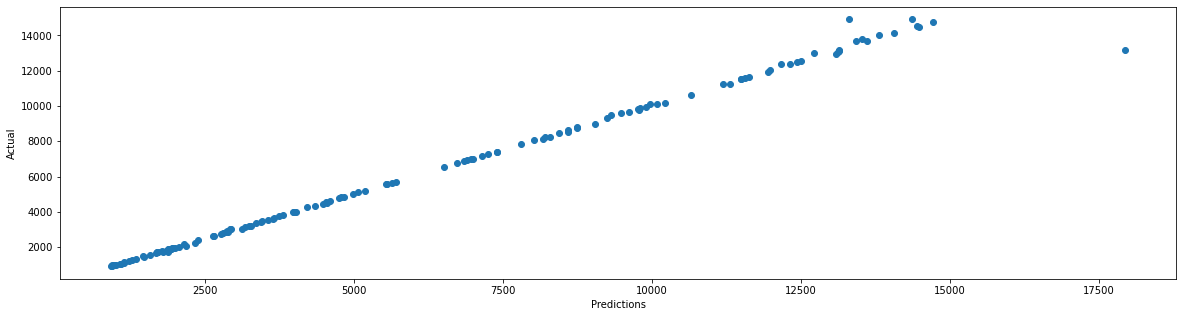

In [58]:
plt.figure(figsize=(20, 5))
plt.scatter(predictions,Test_y)
plt.xlabel("Predictions")
plt.ylabel("Actual")

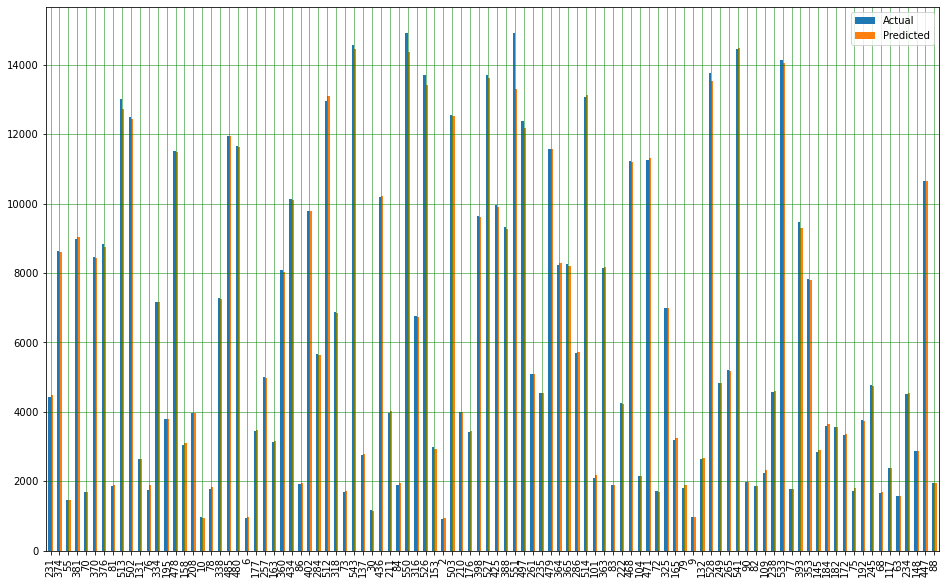

In [60]:
df = pd.DataFrame({'Actual': Test_y, 'Predicted': predictions})
df1 = df.head(100)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [84]:
#Important assessment parameters for model accuracy
print('Explained Variance    = {:0.3f}.'.format(metrics.explained_variance_score(Test_y,predictions)))
print('Max Error             = {:0.3f}.'.format(metrics.max_error(Test_y,predictions)))
print('Mean Absolute Error   = {:0.3f}.'.format(metrics.mean_absolute_error(Test_y,predictions)))
print('Mean Squared Error    = {:0.3f}.'.format(metrics.mean_squared_error(Test_y,predictions)))
print('Median Absolute Error = {:0.3f}.'.format(metrics.median_absolute_error(Test_y,predictions)))
print('R2 Score              = {:0.3f}.'.format(metrics.r2_score(Test_y,predictions)))

Explained Variance    = 0.990.
Max Error             = 4784.343.
Mean Absolute Error   = 94.417.
Mean Squared Error    = 190078.418.
Median Absolute Error = 29.065.
R2 Score              = 0.990.
